In [1]:
import numpy as np
from time import time

In [2]:
obj = [
    [0, 0, 0, 0, 1], 
    [0, 1, 1, 0, 0], 
    [0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0]
]
obj = np.array(obj)

In [ ]:
obj

In [ ]:
# shape

In [3]:
def pi(a):
    s = np.sum(a)
#     for i in range(len(a)):
#         a[i] /= s
#         print(a[i])
    a = np.dot(a, 1/s)
    return a

def get_pi(a):
    for i in range(len(a)):
        for j in range(len(a[0])):
            a[i][j] = pi(a[i][j])
    return a

In [4]:
a = np.array([1, 2, 0, 0])
print(pi(a))

[0.33333333 0.66666667 0.         0.        ]


In [5]:
def action(s):
    # eps는 사전 설정
    ## s_next 생성
    if np.random.rand() > eps:
        return np.argmax(v[s])
    else:
        return np.random.choice([0, 1, 2, 3]) # 상하좌우
    
def state_map(s, a):
    s = list(s)
    if a == 0:
        s[0] -= 1
    elif a == 1:
        s[0] += 1
    elif a == 2:
        s[1] -= 1
    else:
        s[1] += 1
    return tuple(s)


In [6]:
def update(s, a, r, s_next, v):
    # lr, gamma 는 위에서 설정하기
    if s_next == goal:
        v[s][a] = v[s][a] + lr * (r - v[s][a])
    else:
        v[s][a] = v[s][a] + lr * (r + gamma*np.max(v[s_next]) - v[s][a])
#     v[s] = pi(v[s])
    return v


In [7]:
def is_wall(s):
    a = shape[0] - 1
    b = shape[1] -1
    if s[0] < 0 or s[0] > a:
        return True
    elif s[1] < 0 or s[1] > b:
        return True
    elif obj[s] == 1:
        return True
    else:
        return False

In [42]:
def play(s):
    global v, fail_hist, hist, eps
    temp_hist = []
    while 1:
        eps *= np.exp(-0.001)
        temp_hist.append(s)
        a = action(s)
        s_next = state_map(s, a)
        
        if is_wall(s_next):
            fail_hist.append((s, s_next))
            v[s][a] = 0
#             v[s] = pi(v[s])
#             v[s] /= np.sum(v[s])
            s_next = (0, 0)
            
            
        elif s_next[0] == goal[0] and s_next[1] == goal[1]: ## 도착
            r = 1
            v = update(s, a, r, s_next, v)
            break
        else: ## 갈곳이 남음
            r = 0
            v = update(s, a, r , s_next, v)
#             v[s] /= np.sum(v[s])
#             v[s] = pi(v[s])
#             print(v[s])
            
        fake_obj[s_next] = 2
        print(fake_obj, '\n')
        fake_obj[s_next] = obj[s_next]
#         print(eps)
            
        s = s_next
        
    hist.append(temp_hist)

In [43]:
shape = obj.shape
value = [
    [0, 0, 0, 0, 1], 
    [0, 1, 1, 0, 0], 
    [0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0]
]
for i in range(shape[0]):
    for j in range(shape[1]):
        value[i][j] = [0.25, 0.25, 0.25, 0.25] # 위, 아래, 좌, 우
v = np.array(value)

In [61]:
lr = 0.1
eps = 0.5
gamma = 0.95
v = np.array(value)
fail_hist = []
hist = []
fake_obj = obj.copy()
k = float('inf')
c = 0

s_0 = (0, 0)
goal = (3, 4)

start = time()
for e in range(100):
    play(s_0)
    new_k = len(hist[-1])
    if new_k <= k and new_k != float('inf'):
        c += 1
        k = new_k
        if c == 10:
            break
    else:
        k = float('inf')
        c = 0
        
    eps = (0.5 ** (i+1))
    print(eps)

            
    print(e, '###################### \n')
#     print('succes', i)
#     print(eps)
#     eps = 0.5

lt = time() - start

[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[0 0 0 0 1]
 [2 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[0 0 0 0 1]
 [2 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[0 0 0 0 1]
 [0 1 1 0 0]
 [2 0 1 0 0]
 [0 0 1 1 0]] 

[[0 0 0 0 1]
 [2 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[0 0 0 0 1]
 [2 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[0 2 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[0 0 0 0 1]
 [2 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[0 2 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[0 2 0 0 

 [0 0 1 1 0]] 

[[0 0 0 0 1]
 [0 1 1 0 0]
 [2 0 1 0 0]
 [0 0 1 1 0]] 

[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [2 0 1 1 0]] 

[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 2 1 1 0]] 

[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [2 0 1 1 0]] 

[[0 0 0 0 1]
 [0 1 1 0 0]
 [2 0 1 0 0]
 [0 0 1 1 0]] 

[[0 0 0 0 1]
 [2 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[0 2 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[0 0 2 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[2 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[0 0 0 0 1]
 [2 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[0 0 0 0 1]
 [0 1 1 0 0]
 [2 0 1 0 0]
 [0 0 1 1 0]] 

[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 2 1 0 0]
 [0 0 1 1 0]] 

[[0 0 0 0 1]
 [0 1 1 0 0]
 [2 0 1 0 0]
 [0 0 1 1 0]] 

[[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [2 0 1 1 0]] 

[[0 0 0 0 1]
 [0 1 1 0 0]
 [2 0 1 0 0]
 [0 0 1 1 0]] 

[[0 0 0 0 1]
 [2 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]] 

[[0 0 0 0 1]
 [0 1 1 0 0]
 [2 0 1 0 0]
 [0 0 1 1 

In [62]:
for i in range(shape[1]):
    for j in range(shape[0]):
        v[j][i] /= np.sum(v[j][i])
v

array([[[0.        , 0.47979568, 0.        , 0.52020432],
        [0.        , 0.        , 0.44460076, 0.55539924],
        [0.        , 0.        , 0.38794597, 0.61205403],
        [0.        , 0.67496588, 0.32503412, 0.        ],
        [0.25      , 0.25      , 0.25      , 0.25      ]],

       [[0.50080858, 0.49919142, 0.        , 0.        ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.20885333, 0.57052198, 0.        , 0.22062469],
        [0.        , 0.63642811, 0.36357189, 0.        ]],

       [[0.33371223, 0.33354115, 0.        , 0.33274662],
        [0.        , 0.49979524, 0.50020476, 0.        ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.22656562, 0.        , 0.        , 0.77343438],
        [0.17173056, 0.66115718, 0.16711226, 0.        ]],

       [[0.50046701, 0.        , 0.        , 0.49953299],
        [0.49972153, 0.        , 0.50027847, 0.        ],
        

In [ ]:
value = [
    [0, 0, 0, 0, 1], 
    [0, 1, 1, 0, 0], 
    [0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0]
]

In [ ]:
eps

In [ ]:
lt

In [ ]:
c = 0
for h in hist:
    if len(h) == 7:
        c += 1
        
print(c)

In [63]:
lh = list(map(lambda x: len(x), hist))

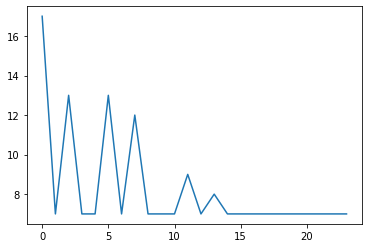

In [64]:
import matplotlib.pyplot as plt

plt.plot(lh[10:])

In [65]:
len(lh)

34